# Tarea 5. Construyendo la frontera de mínima varianza para dos activos.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="600px" height="400px" />

**Resumen.**
> En esta tarea, construirás la frontera de mínima varianza para dos activos riesgosos usando los datos de mercados internacionales que usamos en la clase 10.

> Construirás portafolios que consisten de dos activos riesgosos, graficarás la frontera de mínima varianza y encontrarás el portafolio de mínima varianza. Repetirás luego el ejercicio para otro par de activos y compararás los beneficios de diversificación en cada caso.

> Por favor, revisar la clase 10 para los datos. 

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea5_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea5_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Copiar y pegar los datos de rendimientos esperados, volatilidades y correlaciones de mercados internacionales brindados en la Clase 10.

1. Mostrar los DataFrame con los datos (5 puntos).
2. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (5 puntos).

In [2]:
import pandas as pd
import numpy as np

In [3]:
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [4]:
import matplotlib.pyplot as plt

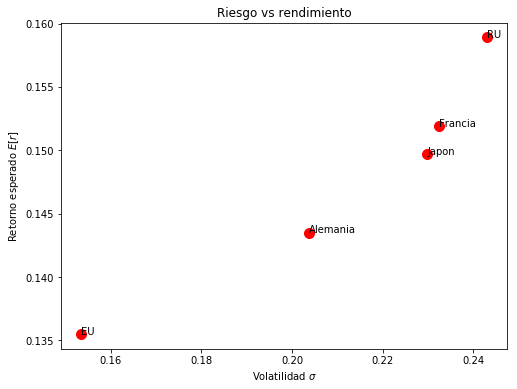

In [5]:
x=annual_ret_summ.loc['Volatilidad'].values
y=annual_ret_summ.loc['Media'].values
plt.figure(figsize=(8,6))
plt.plot(x,y,'ro',ms=10)
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Retorno esperado $E[r]$')
plt.title('Riesgo vs rendimiento')
plt.text(x[0],y[0],annual_ret_summ.columns[0])
plt.text(x[1],y[1],annual_ret_summ.columns[1])
plt.text(x[2],y[2],annual_ret_summ.columns[2])
plt.text(x[3],y[3],annual_ret_summ.columns[3])
plt.text(x[4],y[4],annual_ret_summ.columns[4])
plt.show()

## 2. Portafolios con Japón y Reino Unido (30 puntos)

Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los mercados Japoneses y del Reino Unido como activos riesgosos. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [6]:
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


In [7]:
# Vector de w variando entre 0 y 1 con n pasos
w = np.linspace(0, 1, 30)
# Rendimientos esperados individuales
# Activo1: japon, Activo2:RU
E1 = annual_ret_summ['Japon']['Media']
E2 = annual_ret_summ['RU']['Media']
# Volatilidades individuales
s1 = annual_ret_summ['Japon']['Volatilidad']
s2 = annual_ret_summ['RU']['Volatilidad']
# Correlacion
r12 = corr['Japon']['RU']
portafolios1 = pd.DataFrame(index=w,columns=['Rend','Vol'])
portafolios1.index.name = 'w'
portafolios1.Rend = w*E1+(1-w)*E2
portafolios1.Vol = np.sqrt((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*r12*s1*s2)
portafolios1.round(4)

,Rend,Vol
w,,
0.000000,0.1589,0.2430
0.034483,0.1586,0.2376
0.068966,0.1583,0.2324
0.103448,0.1579,0.2275
0.137931,0.1576,0.2228
0.172414,0.1573,0.2184
0.206897,0.1570,0.2144
0.241379,0.1567,0.2107
0.275862,0.1564,0.2073


In [8]:
import scipy.optimize as opt
def var2(w,s1,s2,s12):
    return (w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*s12
w0=0
# Volatilidades individuales y covarianza
s1=annual_ret_summ['Japon']['Volatilidad']
s2=annual_ret_summ['RU']['Volatilidad']
s12 = corr['Japon']['RU']*s1*s2

# Cota de w
bnd=(0,1)
minvar2=opt.minimize(var2,w0,args=(s1,s2,s12),bounds=(bnd,))
minvar2

      fun: array([0.03782716])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.46944695e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.54342233])

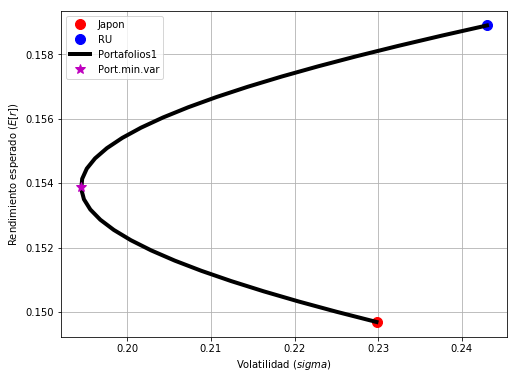

In [9]:
plt.figure(figsize=(8,6))
plt.plot(s1, E1, 'ro', ms = 10, label='Japon')
plt.plot(s2, E2, 'bo', ms = 10, label='RU')
plt.plot(portafolios1.Vol, portafolios1.Rend, 'k-', lw = 4, label='Portafolios1')
plt.plot(np.sqrt(minvar2.fun),minvar2.x*E1+(1-minvar2.x)*E2,'*m',ms=10,label='Port.min.var')
plt.xlabel('Volatilidad ($sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
plt.legend(loc='best')
plt.grid()
plt.show()

In [8]:
w_minvar = (s2**2-(r12*s1*s2))/(s1**2+s2**2-2*(r12*s1*s2))
w=round(w_minvar,6)
mr=1-w_minvar
minRU=round(mr,6)
print(w*100,'% en Japon, ',(1-w)*100,'% en Reino Unido')

54.3422 % en Japon,  45.6578 % en Reino Unido


In [9]:
er=w*E1+(1-w)*E2
print('Rendimiento esperado: ',er)

Rendimiento esperado:  0.1539005176


In [10]:
vol = np.sqrt((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*r12*s1*s2)
print('Volatilidad: ',vol)

Volatilidad:  0.19449206680735467


## 3. Mismos activos, distinta correlación (30 puntos)

En este punto se usarán los mismos activos (Japón y Reino Unido) con sus rendimientos esperados y volatilidades, solo que supondremos que el coeficiente de correlación entre sus rendimiento es de 0.5.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos con el nuevo supuesto de correlación. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [13]:
# Vector de w variando entre 0 y 1 con n pasos
w = np.linspace(0, 1, 30)
# Rendimientos esperados individuales
# Activo1: japon, Activo2:RU
e1 = annual_ret_summ['Japon']['Media']
e2 = annual_ret_summ['RU']['Media']
# Volatilidades individuales
S1 = annual_ret_summ['Japon']['Volatilidad']
S2 = annual_ret_summ['RU']['Volatilidad']
# Correlacion
R12 = .5
portafolios2 = pd.DataFrame(index=w,columns=['Rend','Vol'])
portafolios2.index.name = 'w'
portafolios2.Rend = w*e1+(1-w)*e2
portafolios2.Vol = np.sqrt((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*R12*S1*S2)
portafolios2.round(4)

,Rend,Vol
w,,
0.000000,0.1589,0.2430
0.034483,0.1586,0.2387
0.068966,0.1583,0.2346
0.103448,0.1579,0.2307
0.137931,0.1576,0.2270
0.172414,0.1573,0.2236
0.206897,0.1570,0.2204
0.241379,0.1567,0.2175
0.275862,0.1564,0.2148


In [14]:
import scipy.optimize as opt
def var2(w,s1,s2,s12):
    return (w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*s12
w0=0
# Volatilidades individuales y covarianza
S1=annual_ret_summ['Japon']['Volatilidad']
S2=annual_ret_summ['RU']['Volatilidad']
S12 = .5*s1*s2

# Cota de w
bnd=(0,1)
minvar3=opt.minimize(var2,w0,args=(S1,S2,S12),bounds=(bnd,))
minvar3

      fun: array([0.04175078])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.77555756e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.55570732])

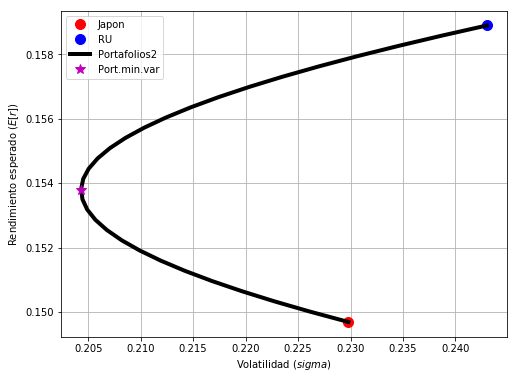

In [15]:
plt.figure(figsize=(8,6))
plt.plot(S1, e1, 'ro', ms = 10, label='Japon')
plt.plot(S2, e2, 'bo', ms = 10, label='RU')
plt.plot(portafolios2.Vol, portafolios2.Rend, 'k-', lw = 4, label='Portafolios2')
plt.plot(np.sqrt(minvar3.fun),minvar3.x*e1+(1-minvar3.x)*e2,'*m',ms=10,label='Port.min.var')
plt.xlabel('Volatilidad ($sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
plt.legend(loc='best')
plt.grid()
plt.show()

In [16]:
w_minvar = (s2**2-(R12*s1*s2))/(s1**2+s2**2-2*(R12*s1*s2))
w=round(w_minvar,6)
print(w*100,'% en Japon, ',(1-w)*100,'% en Reino Unido')

55.570699999999995 % en Japon,  44.429300000000005 % en Reino Unido


In [17]:
er=w*E1+(1-w)*E2
print('Rendimiento esperado: ',er)

Rendimiento esperado:  0.1537874956


In [18]:
vol = np.sqrt((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*R12*s1*s2)
print('Volatilidad: ',vol)

Volatilidad:  0.20433006750834404


## 4. Gráficos y conclusiones (30 puntos)

1. Usando sus respuestas para los puntos 2 y 3, grafique las dos fronteras encontradas en una sola gráfica, además de los puntos correspondientes a los activos individuales, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

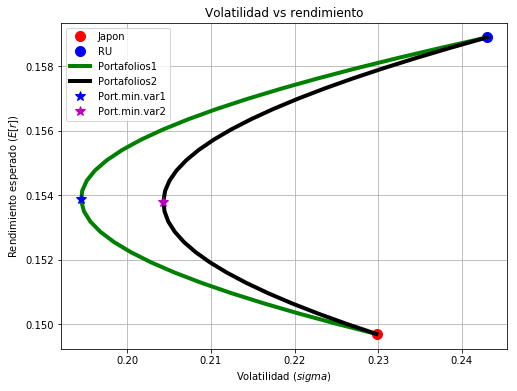

In [20]:
plt.figure(figsize=(8,6))
plt.plot(s1, E1, 'ro', ms = 10, label='Japon')
plt.plot(s2, E2, 'bo', ms = 10, label='RU')
plt.plot(portafolios1.Vol, portafolios1.Rend, 'g-', lw = 4, label='Portafolios1')
plt.plot(portafolios2.Vol, portafolios2.Rend, 'k-', lw = 4, label='Portafolios2')
plt.plot(np.sqrt(minvar2.fun),minvar2.x*E1+(1-minvar2.x)*E2,'*b',ms=10,label='Port.min.var1')
plt.plot(np.sqrt(minvar3.fun),minvar3.x*e1+(1-minvar3.x)*e2,'*m',ms=10,label='Port.min.var2')
plt.title('Volatilidad vs rendimiento')
plt.xlabel('Volatilidad ($sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
plt.legend(loc='best')
plt.grid()
plt.show()

La primer grafica que se creó (Portafolios1) es la que provee mayor diversificación. Esto se explica por el coeficiente de correlación que se estableció. Portafolios1 cuenta con .3581 y Portafolios2 con .5, al haber menos correlación, como vimos en la clase 9, el efecto en la diversificación es una mayor reducción del riesgo.

Los pesos de los portafolios varían por un 1%, a pesar de el cambio de correlación, lo que obtiene un mayor rendimiento con un menor riesgo sigue siendo los mismos pesos aproximadamente.

El rendimiento no cambia pues la correlación no lo afecta, la esperanza es lineal. Sin embargo, el riesgo sí aumentó al aumentar la correlacón, esto por el efecto en la diversificación del coeficiente de correlación

Cuando hay mayor correlación, el portafolio de minima varianza le da un mayor peso al activo con el mayor rendimiento,haciendo que el rendimiento sea cada vez mayor, pero con un riesgo también mayor, obviamente teniendo como límite el portafolio con el mayor rendimiento

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>